In [7]:
import pandas as pd
import re
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data, feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus, genre_as_graph


# Classifying Bible

In [8]:
rel_features_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/rel_features.csv", index_col=0, sep="\t")

In [9]:
books_genre_boolean_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/labels.csv", sep = "\t", index_col = 0)

In [10]:
books_genre_boolean_df

,apocalyptic,gospel,historical,law,letter,lyric,prophecy,wisdom
codebook,,,,,,,,
1CH,0,0,1,0,0,0,0,0
1CO,0,0,0,0,1,0,0,0
1JO,0,0,0,0,1,0,0,0
1KI,0,0,1,0,0,0,0,0
1PE,0,0,0,0,1,0,0,0
1SA,0,0,1,0,0,0,0,0
1TH,0,0,0,0,1,0,0,0
1TI,0,0,0,0,1,0,0,0
2CH,0,0,1,0,0,0,0,0


In [11]:
rel_features_df

,ent ref,pers,rss,qs,who ent,orgs,qs-oral,1st-lev-qs,plas,mq-ent-freq-2,...,names of jesus,the flag,memorizing scriptures,henotheism,blessings of children,healthy babies,birth of a baby,diff toWhom ent,1st perc rss,toWhom ent
1CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1CO,768.0,367.0,437.0,437.0,16.0,358.0,4.0,28.0,24.0,123.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1JO,256.0,163.0,105.0,105.0,3.0,74.0,3.0,3.0,2.0,48.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1KI,3411.0,1977.0,816.0,816.0,498.0,637.0,395.0,402.0,775.0,290.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1PE,189.0,107.0,105.0,105.0,6.0,68.0,4.0,8.0,11.0,34.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1SA,3513.0,2104.0,810.0,810.0,592.0,828.0,533.0,534.0,579.0,415.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1TH,177.0,115.0,89.0,89.0,1.0,46.0,0.0,1.0,12.0,43.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1TI,202.0,92.0,113.0,113.0,1.0,103.0,0.0,3.0,2.0,27.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2CO,367.0,231.0,257.0,257.0,5.0,105.0,5.0,8.0,25.0,86.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [12]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/"

In [38]:
books_genre_boolean_df.columns.tolist()

['apocalyptic',
 'gospel',
 'historical',
 'law',
 'letter',
 'lyric',
 'prophecy',
 'wisdom']

In [37]:
classification_results_bible_df = classify.classify(wdir, freq_table  = rel_features_df, metadata = books_genre_boolean_df,
             sep = "\t", classes = books_genre_boolean_df.columns.tolist(), verbose = True, methods = ["SVC","LR"], min_MFF = 0,
             max_MFFs = [30,50,100,500,1000], text_representations = ["log","zscores","tfidf","raw"], typographies = [True],
             sampling_mode = "cross", 
             minimal_value_samples = 2, make_relative = False,
             under_sample_method = "lpc", maximum_cases = 5000, sampling_times = 3, outdir_results = "",
             )

cut_raw_features       ent ref    pers    rss     qs  who ent   orgs  qs-oral  1st-lev-qs  \
1CH      0.0     0.0    0.0    0.0      0.0    0.0      0.0         0.0   
1CO    768.0   367.0  437.0  437.0     16.0  358.0      4.0        28.0   
1JO    256.0   163.0  105.0  105.0      3.0   74.0      3.0         3.0   
1KI   3411.0  1977.0  816.0  816.0    498.0  637.0    395.0       402.0   
1PE    189.0   107.0  105.0  105.0      6.0   68.0      4.0         8.0   

      plas  mq-ent-freq-2     ...      names of jesus  the flag  \
1CH    0.0            0.0     ...                 0.0       0.0   
1CO   24.0          123.0     ...                 0.0       0.0   
1JO    2.0           48.0     ...                 0.0       0.0   
1KI  775.0          290.0     ...                 0.0       0.0   
1PE   11.0           34.0     ...                 0.0       0.0   

     memorizing scriptures  henotheism  blessings of children  healthy babies  \
1CH                    0.0         0.0         

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (4,) (4, 29) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1180339887498945, pvalue=0.314372637647017)
Class: 	 apocalyptic
Scores:
 	 f1          0.833
rec         1.000
prec        0.750
f1_macro    0.667
f1_micro    0.750
dtype: float64
p-value:  0.3144
Baseline: 		 0.5
SVC
0.33299999999999996
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (4,) (4, 29) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 30)
undersampling lpc
undersampled (4,) (4, 29) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 30)
undersampling lpc
undersampled (4,) (4, 29) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.533985905294663, pvalue=0.002642605442044798)
Class: 	 apocalyptic
Scores:
 	 f1          1.0
rec         1.0
prec        1.0
f1_macro    1.0
f1_micro    1.0
dtype: f

(66,)
(66, 50)
undersampling lpc
undersampled (4,) (4, 50) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 50)
undersampling lpc
undersampled (4,) (4, 50) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.118033988749895, pvalue=0.3143726376470169)
Class: 	 apocalyptic
Scores:
 	 f1          0.333
rec         0.500
prec        0.250
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.3144
Baseline: 		 0.5
LR
-0.16699999999999998
MFW 100
The three first MFWs:  ['verses', '100th perc qs', 'std qs']
The three last MFWs:  ['shellfish', 'samson and delilah', 'ultimate sacrifice']
method used:	 SVC
(66,)
(66, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 100)
undersampling lpc
undersampled (4,) (4, 100) lpc
cross validation sampling

(66,)
(66, 100)
undersampling lpc
undersampled (4,) (4, 64) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.2711630722733203, pvalue=0.7971043696903526)
Class: 	 apocalyptic
Scores:
 	 f1          0.333
rec         0.500
prec        0.250
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.7971
Baseline: 		 0.5
LR
-0.16699999999999998
MFW 500
The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['death to self', 'zodiac signs', 'planting your garden']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (4,) (4, 264) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 500)
undersampling lpc
undersampled (4,) (4, 277) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 500)
undersampling lpc
undersampled (4,) (4, 241) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.6142951

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Class: 	 apocalyptic
Scores:
 	 f1          0.500
rec         0.500
prec        0.500
f1_macro    0.667
f1_micro    0.750
dtype: float64
p-value:  1.0
Baseline: 		 0.5
SVC
0.0
method used:	 LR
(66,)
(66, 1000)
undersampling lpc
undersampled (4,) (4, 332) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 1000)
undersampling lpc
undersampled (4,) (4, 476) lpc
cross validation sampling of  apocalyptic
(66,)
(66, 1000)
undersampling lpc
undersampled (4,) (4, 520) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.3306690738754696e-16, pvalue=0.9999999999999998)
Class: 	 apocalyptic
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  1.0
Baseline: 		 0.5
LR
0.16700000000000004


analysed class:	 gospel
* Culling data
labels done
Counter({'0': 61

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(66, 6037)
MFW 30
The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['diff wors', 'diff tims', 'verses']
method used:	 SVC
(66,)
(66, 30)
undersampling lpc
undersampled (10,) (10, 29) lpc
cross validation sampling of  gospel
(66,)
(66, 30)
undersampling lpc
undersampled (10,) (10, 29) lpc
cross validation sampling of  gospel
(66,)
(66, 30)
undersampling lpc
undersampled (10,) (10, 29) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.490095645318659, pvalue=0.0005087479122638724)
Class: 	 gospel
Scores:
 	 f1          0.867
rec         1.000
prec        0.800
f1_macro    0.733
f1_micro    0.800
dtype: float64
p-value:  0.0005
Baseline: 		 0.5
SVC
0.367
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (10,) (10, 30) lpc
cross validation sampling of  gospel
(66,)
(66, 30)
undersampling lpc
undersampled (10,) (10, 29) lpc
cross 

(66,)
(66, 50)
undersampling lpc
undersampled (10,) (10, 50) lpc
cross validation sampling of  gospel
(66,)
(66, 50)
undersampling lpc
undersampled (10,) (10, 50) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1456439237389595, pvalue=0.27114900383167007)
Class: 	 gospel
Scores:
 	 f1          0.600
rec         0.800
prec        0.500
f1_macro    0.467
f1_micro    0.600
dtype: float64
p-value:  0.2711
Baseline: 		 0.5
LR
0.09999999999999998
MFW 100
The three first MFWs:  ['verses', '100th perc qs', 'std qs']
The three last MFWs:  ['shellfish', 'samson and delilah', 'ultimate sacrifice']
method used:	 SVC
(66,)
(66, 100)
undersampling lpc
undersampled (10,) (10, 100) lpc
cross validation sampling of  gospel
(66,)
(66, 100)
undersampling lpc
undersampled (10,) (10, 100) lpc
cross validation sampling of  gospel
(66,)
(66, 100)
undersampling lpc
undersampled (10,) (10, 100) lpc
cross validation sampling of  gospel
res

(66,)
(66, 100)
undersampling lpc
undersampled (10,) (10, 91) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.245911317719117, pvalue=0.04137155766266945)
Class: 	 gospel
Scores:
 	 f1          0.800
rec         0.800
prec        0.800
f1_macro    0.867
f1_micro    0.900
dtype: float64
p-value:  0.0414
Baseline: 		 0.5
LR
0.30000000000000004
MFW 500
The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['death to self', 'zodiac signs', 'planting your garden']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (10,) (10, 397) lpc
cross validation sampling of  gospel
(66,)
(66, 500)
undersampling lpc
undersampled (10,) (10, 429) lpc
cross validation sampling of  gospel
(66,)
(66, 500)
undersampling lpc
undersampled (10,) (10, 414) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.311288200277135, pvalue=0.2

(66,)
(66, 500)
undersampling lpc
undersampled (10,) (10, 446) lpc
cross validation sampling of  gospel
(66,)
(66, 500)
undersampling lpc
undersampled (10,) (10, 423) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.6445502286477758, pvalue=0.12232132778687996)
Class: 	 gospel
Scores:
 	 f1          0.800
rec         0.800
prec        0.800
f1_macro    0.867
f1_micro    0.900
dtype: float64
p-value:  0.1223
Baseline: 		 0.5
LR
0.30000000000000004
MFW 1000
The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['women in church', 'new beginning', 'chewing tobacco']
method used:	 SVC
(66,)
(66, 1000)
undersampling lpc
undersampled (10,) (10, 830) lpc
cross validation sampling of  gospel
(66,)
(66, 1000)
undersampling lpc
undersampled (10,) (10, 780) lpc
cross validation sampling of  gospel
(66,)
(66, 1000)
undersampling lpc
undersampled (10,) (10, 882) lpc
cross validation sampling of  gospel
result o

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (30,) (30, 30) lpc
cross validation sampling of  historical
(66,)
(66, 30)
undersampling lpc
undersampled (30,) (30, 30) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.941414515447885, pvalue=2.985228718429468e-05)
Class: 	 historical
Scores:
 	 f1          0.900
rec         0.950
prec        0.867
f1_macro    0.867
f1_micro    0.875
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.4
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (30,) (30, 30) lpc
cross validation sampling of  historical
(66,)
(66, 30)
undersampling lpc
undersampled (30,) (30, 30) lpc
cross validation sampling of  historical
(66,)
(66, 30)
undersampling lpc
undersampled (30,) (30, 30) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.256928201682714, pvalue=1.2420177352445741e-05)
Class: 	 historical
Score

(66,)
(66, 50)
undersampling lpc
undersampled (30,) (30, 50) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.312880534881886, pvalue=0.00017008213806310563)
Class: 	 historical
Scores:
 	 f1          0.70
rec         0.70
prec        0.75
f1_macro    0.68
f1_micro    0.70
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
SVC
0.19999999999999996
method used:	 LR
(66,)
(66, 50)
undersampling lpc
undersampled (30,) (30, 50) lpc
cross validation sampling of  historical
(66,)
(66, 50)
undersampling lpc
undersampled (30,) (30, 50) lpc
cross validation sampling of  historical
(66,)
(66, 50)
undersampling lpc
undersampled (30,) (30, 50) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.431960660833924, pvalue=3.4415393921610066e-08)
Class: 	 historical
Scores:
 	 f1          0.913
rec         0.900
prec        0.967
f1_macro    0.920
f1_micro    0

The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['faith love grace', 'worried', 'quick money']
method used:	 SVC
(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 96) lpc
cross validation sampling of  historical
(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 94) lpc
cross validation sampling of  historical
(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 96) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7350799677711972, pvalue=0.09334422827990496)
Class: 	 historical
Scores:
 	 f1          0.493
rec         0.550
prec        0.483
f1_macro    0.573
f1_micro    0.650
dtype: float64
p-value:  0.0933
Baseline: 		 0.5
SVC
-0.007000000000000006
method used:	 LR
(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 97) lpc
cross validation sampling of  historical
(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 92) lpc
cross validation samp

(66,)
(66, 100)
undersampling lpc
undersampled (30,) (30, 97) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.310116986185703, pvalue=6.827204909750831e-07)
Class: 	 historical
Scores:
 	 f1          0.713
rec         0.750
prec        0.717
f1_macro    0.747
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.21299999999999997
MFW 500
The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['zodiac signs', 'christlikeness', 'competence']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (30,) (30, 472) lpc
cross validation sampling of  historical
(66,)
(66, 500)
undersampling lpc
undersampled (30,) (30, 480) lpc
cross validation sampling of  historical
(66,)
(66, 500)
undersampling lpc
undersampled (30,) (30, 487) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.273099162113649, pvalue=7.5

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  law
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.2294816068526147, pvalue=0.05634253158018397)
Class: 	 law
Scores:
 	 f1          0.556
rec         0.667
prec        0.500
f1_macro    0.556
f1_micro    0.667
dtype: float64
p-value:  0.0563
Baseline: 		 0.5
SVC
0.05600000000000005
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  law
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  law
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.8029550685469663, pvalue=0.445198869466203)
Class: 	 law
Scores:
 	 f1          0.889
rec         1.000
pre

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.1348399724926482, pvalue=0.896069217732034)
Class: 	 law
Scores:
 	 f1          0.444
rec         0.667
prec        0.333
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.8961
Baseline: 		 0.5
SVC
-0.055999999999999994
method used:	 LR
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  law
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  law
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.5000000000000002, pvalue=0.6305360755569762)
Class: 	 law
Scores:
 	 f1          0.667
rec         1.000
prec        0.500
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.6305
Baseline: 		 0.5
LR
0.16700000000000004
MFW 100
The three first MFWs:  ['verses', '100th perc qs', 'std qs']
T

(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 72) lpc
cross validation sampling of  law
(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 57) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1235807588017876, pvalue=0.014151882766696627)
Class: 	 law
Scores:
 	 f1          1.0
rec         1.0
prec        1.0
f1_macro    1.0
f1_micro    1.0
dtype: float64
p-value:  0.0142
Baseline: 		 0.5
LR
0.5
MFW 500
The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['death to self', 'zodiac signs', 'planting your garden']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 222) lpc
cross validation sampling of  law
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 268) lpc
cross validation sampling of  law
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 296) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_

(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 490) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.5, pvalue=0.03694203771362407)
Class: 	 law
Scores:
 	 f1          0.889
rec         1.000
prec        0.833
f1_macro    0.778
f1_micro    0.833
dtype: float64
p-value:  0.0369
Baseline: 		 0.5
SVC
0.389
method used:	 LR
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 407) lpc
cross validation sampling of  law
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 311) lpc
cross validation sampling of  law
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 510) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2247448713915887, pvalue=0.2555081504311323)
Class: 	 law
Scores:
 	 f1          0.556
rec         0.667
prec        0.500
f1_macro    0.444
f1_micro    0.500
dtype: float64
p-value:  0.2555
Baseline: 		 0.5
LR
0.05600000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
(66,)
(66, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.502715393499862, pvalue=2.5153354191798456e-12)
Class: 	 letter
Scores:
 	 f1          0.793
rec         0.850
prec        0.783
f1_macro    0.753
f1_micro    0.775
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.29300000000000004
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
(66,)
(66, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
(66,)
(66, 30)
undersampling lpc
undersampled (42,) (42, 29) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.712821435509078, pvalue=1.2729486667732507e-10)
Class: 	 letter
Scores:
 	 f1  

(66,)
(66, 50)
undersampling lpc
undersampled (42,) (42, 50) lpc
cross validation sampling of  letter
(66,)
(66, 50)
undersampling lpc
undersampled (42,) (42, 50) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.483680323845794, pvalue=3.008884831145307e-08)
Class: 	 letter
Scores:
 	 f1          0.827
rec         0.817
prec        0.900
f1_macro    0.833
f1_micro    0.842
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.32699999999999996
method used:	 LR
(66,)
(66, 50)
undersampling lpc
undersampled (42,) (42, 50) lpc
cross validation sampling of  letter
(66,)
(66, 50)
undersampling lpc
undersampled (42,) (42, 50) lpc
cross validation sampling of  letter
(66,)
(66, 50)
undersampling lpc
undersampled (42,) (42, 50) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.706260028142073, pvalue=3.575720289993813e-06)
Class: 	 letter
Scores:
 	 f1     

(66,)
(66, 100)
undersampling lpc
undersampled (42,) (42, 99) lpc
cross validation sampling of  letter
(66,)
(66, 100)
undersampling lpc
undersampled (42,) (42, 100) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.389328103104177, pvalue=7.005250808047282e-17)
Class: 	 letter
Scores:
 	 f1          0.932
rec         0.950
prec        0.942
f1_macro    0.930
f1_micro    0.933
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.43200000000000005
method used:	 LR
(66,)
(66, 100)
undersampling lpc
undersampled (42,) (42, 100) lpc
cross validation sampling of  letter
(66,)
(66, 100)
undersampling lpc
undersampled (42,) (42, 100) lpc
cross validation sampling of  letter
(66,)
(66, 100)
undersampling lpc
undersampled (42,) (42, 100) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=20.962151201391997, pvalue=4.57744969163718e-19)
Class: 	 letter
Scores:


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.24891299659233, pvalue=8.686029524455732e-17)
Class: 	 letter
Scores:
 	 f1          0.935
rec         1.000
prec        0.893
f1_macro    0.909
f1_micro    0.917
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.43500000000000005
method used:	 LR
(66,)
(66, 500)
undersampling lpc
undersampled (42,) (42, 496) lpc
cross validation sampling of  letter
(66,)
(66, 500)
undersampling lpc
undersampled (42,) (42, 497) lpc
cross validation sampling of  letter
(66,)
(66, 500)
undersampling lpc
undersampled (42,) (42, 495) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=25.443103959998314, pvalue=2.2037305816783015e-21)
Class: 	 letter
Scores:
 	 f1          0.940
rec         1.000
prec        0.900
f1_macro    0.920
f1_micro    0.925
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.43999999999999995
MFW 1000
The three first MFWs:  ['ent ref', 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['diff wors', 'diff tims', 'verses']
method used:	 SVC
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  lyric
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  lyric
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.31622776601683805, pvalue=0.759922968348739)
Class: 	 lyric
Scores:
 	 f1          0.333
rec         0.333
prec        0.333
f1_macro    0.444
f1_micro    0.500
dtype: float64
p-value:  0.7599
Baseline: 		 0.5
SVC
-0.16699999999999998
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  lyric
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  lyric
(66,)
(66, 30)
undersampling lpc
undersampled 

(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.375872022286243, pvalue=0.0006649127711085927)
Class: 	 lyric
Scores:
 	 f1          0.889
rec         1.000
prec        0.833
f1_macro    0.778
f1_micro    0.833
dtype: float64
p-value:  0.0007
Baseline: 		 0.5
SVC
0.389
method used:	 LR
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  lyric
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  lyric
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.4924050144892733, pvalue=0.1739385971650662)
Class: 	 lyric
Scores:
 	 f1          0.444
rec         0.667
prec        0.333
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.1739
Baseline: 		 0

(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 84) lpc
cross validation sampling of  lyric
(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 76) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8551861104941366, pvalue=0.4173225573006373)
Class: 	 lyric
Scores:
 	 f1          0.222
rec         0.333
prec        0.167
f1_macro    0.222
f1_micro    0.333
dtype: float64
p-value:  0.4173
Baseline: 		 0.5
LR
-0.278
MFW 500
The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['death to self', 'zodiac signs', 'planting your garden']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 266) lpc
cross validation sampling of  lyric
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 323) lpc
cross validation sampling of  lyric
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 281) lpc
cross validation sampling of  lyric
result of comparing cross-valid

The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['women in church', 'new beginning', 'chewing tobacco']
method used:	 SVC
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 490) lpc
cross validation sampling of  lyric
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 585) lpc
cross validation sampling of  lyric
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 465) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2247448713915896, pvalue=0.2555081504311321)
Class: 	 lyric
Scores:
 	 f1          0.000
rec         0.000
prec        0.000
f1_macro    0.111
f1_micro    0.167
dtype: float64
p-value:  0.2555
Baseline: 		 0.5
SVC
-0.5
method used:	 LR
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 483) lpc
cross validation sampling of  lyric
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 719) lpc
cross validation sampling of  lyric
(66,)
(66, 1000)
undersampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (28,) (28, 30) lpc
cross validation sampling of  prophecy
(66,)
(66, 30)
undersampling lpc
undersampled (28,) (28, 29) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.506884394586726, pvalue=6.207370168727205e-06)
Class: 	 prophecy
Scores:
 	 f1          0.767
rec         0.800
prec        0.800
f1_macro    0.747
f1_micro    0.800
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.267
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (28,) (28, 29) lpc
cross validation sampling of  prophecy
(66,)
(66, 30)
undersampling lpc
undersampled (28,) (28, 29) lpc
cross validation sampling of  prophecy
(66,)
(66, 30)
undersampling lpc
undersampled (28,) (28, 29) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.869357096131536, pvalue=9.327732248343663e-10)
Class: 	 prophecy
Scores:
 	 f1     

(66,)
(66, 50)
undersampling lpc
undersampled (28,) (28, 50) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.266400890035195, pvalue=0.00019325060329669028)
Class: 	 prophecy
Scores:
 	 f1          0.687
rec         0.800
prec        0.650
f1_macro    0.600
f1_micro    0.675
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
SVC
0.18700000000000006
method used:	 LR
(66,)
(66, 50)
undersampling lpc
undersampled (28,) (28, 50) lpc
cross validation sampling of  prophecy
(66,)
(66, 50)
undersampling lpc
undersampled (28,) (28, 50) lpc
cross validation sampling of  prophecy
(66,)
(66, 50)
undersampling lpc
undersampled (28,) (28, 50) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.084146488490155, pvalue=2.0075655110425644e-05)
Class: 	 prophecy
Scores:
 	 f1          0.663
rec         0.750
prec        0.667
f1_macro    0.570
f1_micro    0.625
dt

(66,)
(66, 100)
undersampling lpc
undersampled (28,) (28, 99) lpc
cross validation sampling of  prophecy
(66,)
(66, 100)
undersampling lpc
undersampled (28,) (28, 89) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.9585176411787426, pvalue=0.0060972343621178045)
Class: 	 prophecy
Scores:
 	 f1          0.533
rec         0.600
prec        0.500
f1_macro    0.567
f1_micro    0.650
dtype: float64
p-value:  0.0061
Baseline: 		 0.5
SVC
0.03300000000000003
method used:	 LR
(66,)
(66, 100)
undersampling lpc
undersampled (28,) (28, 89) lpc
cross validation sampling of  prophecy
(66,)
(66, 100)
undersampling lpc
undersampled (28,) (28, 94) lpc
cross validation sampling of  prophecy
(66,)
(66, 100)
undersampling lpc
undersampled (28,) (28, 93) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.87249126303964, pvalue=0.0005649524859860037)
Class: 	 proph

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.736631196565773, pvalue=0.010487250004973591)
Class: 	 prophecy
Scores:
 	 f1          0.693
rec         0.800
prec        0.633
f1_macro    0.680
f1_micro    0.750
dtype: float64
p-value:  0.0105
Baseline: 		 0.5
SVC
0.19299999999999995
method used:	 LR
(66,)
(66, 500)
undersampling lpc
undersampled (28,) (28, 454) lpc
cross validation sampling of  prophecy
(66,)
(66, 500)
undersampling lpc
undersampled (28,) (28, 474) lpc
cross validation sampling of  prophecy
(66,)
(66, 500)
undersampling lpc
undersampled (28,) (28, 471) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.683894547209336, pvalue=3.8035936143669904e-06)
Class: 	 prophecy
Scores:
 	 f1          0.813
rec         0.900
prec        0.767
f1_macro    0.773
f1_micro    0.825
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31299999999999994
MFW 1000
The three first MFWs:  [

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  wisdom
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8551861104941366, pvalue=0.4173225573006373)
Class: 	 wisdom
Scores:
 	 f1          0.222
rec         0.333
prec        0.167
f1_macro    0.222
f1_micro    0.333
dtype: float64
p-value:  0.4173
Baseline: 		 0.5
SVC
-0.278
method used:	 LR
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  wisdom
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  wisdom
(66,)
(66, 30)
undersampling lpc
undersampled (6,) (6, 29) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.5000000000000004, pvalue=0.008079082260411881)
Class: 	 wisdom
Scores:
 	 f1          0.333
rec      

(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  wisdom
(66,)
(66, 50)
undersampling lpc
undersampled (6,) (6, 50) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9999999999999998, pvalue=0.34659350708733405)
Class: 	 wisdom
Scores:
 	 f1          1.0
rec         1.0
prec        1.0
f1_macro    1.0
f1_micro    1.0
dtype: float64
p-value:  0.3466
Baseline: 		 0.5
LR
0.5
MFW 100
The three first MFWs:  ['verses', '100th perc qs', 'std qs']
The three last MFWs:  ['shellfish', 'samson and delilah', 'ultimate sacrifice']
method used:	 SVC
(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 100) lpc
cross validation sampling of  wisdom
(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 100) lpc
cross validation sampling of  wisdom
(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 100) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to

(66,)
(66, 100)
undersampling lpc
undersampled (6,) (6, 83) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.5000000000000004, pvalue=0.03694203771362403)
Class: 	 wisdom
Scores:
 	 f1          0.444
rec         0.667
prec        0.333
f1_macro    0.222
f1_micro    0.333
dtype: float64
p-value:  0.0369
Baseline: 		 0.5
LR
-0.055999999999999994
MFW 500
The three first MFWs:  ['who ent', 'qs-oral', '2nd-lev-qs']
The three last MFWs:  ['death to self', 'zodiac signs', 'planting your garden']
method used:	 SVC
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 247) lpc
cross validation sampling of  wisdom
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 316) lpc
cross validation sampling of  wisdom
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 318) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.506513254633251, pvalue=0.0365

(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 268) lpc
cross validation sampling of  wisdom
(66,)
(66, 500)
undersampling lpc
undersampled (6,) (6, 256) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.11704114719613072, pvalue=0.9097124492264894)
Class: 	 wisdom
Scores:
 	 f1          0.556
rec         0.667
prec        0.500
f1_macro    0.556
f1_micro    0.667
dtype: float64
p-value:  0.9097
Baseline: 		 0.5
LR
0.05600000000000005
MFW 1000
The three first MFWs:  ['ent ref', 'pers', 'rss']
The three last MFWs:  ['women in church', 'new beginning', 'chewing tobacco']
method used:	 SVC
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 648) lpc
cross validation sampling of  wisdom
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 611) lpc
cross validation sampling of  wisdom
(66,)
(66, 1000)
undersampling lpc
undersampled (6,) (6, 754) lpc
cross validation sampling of  wisdom
result of compari

In [39]:
classification_results_bible_df.head()

,class,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
1,apocalyptic,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,log,30,True,"[0.67, 1.0, 0.67, 1.0, 1.0, 1.0]",0.002643,codebook 1TI 0 ISA 1 REV 1 1CO 0 N...,4,2,3,"LogisticRegression(C=1.0, class_weight=None, d..."
10,apocalyptic,1.0,1.0,1.0,1.0,1.0,0.5,0.5,SVC,zscores,30,True,"[1.0, 0.67, 0.0, 0.67, 1.0, 1.0]",0.221289,codebook ISA 1 ECC 0 REV 1 EPH 0 N...,4,2,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
311,wisdom,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,raw,30,True,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]",0.095452,codebook ACT 0 PRO 1 EXO 0 ECC 1 J...,6,3,3,"LogisticRegression(C=1.0, class_weight=None, d..."
141,law,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,tfidf,30,True,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.000000,codebook HOS 0 DEU 1 MAR 0 LUK 0 L...,6,3,3,"LogisticRegression(C=1.0, class_weight=None, d..."
152,law,1.0,1.0,1.0,1.0,1.0,0.5,0.5,SVC,raw,50,True,"[1.0, 1.0, 0.67, 1.0, 1.0, 0.67, 1.0, 1.0, 1.0]",0.000024,codebook 1CO 0 DEU 1 LEV 1 MAR 0 N...,6,3,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."


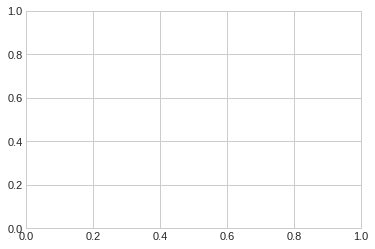

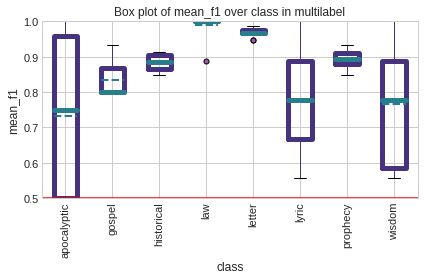

In [40]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class"]).head(10), "mean_f1", "class", wdir,"multilabel", rotation=90, baseline=0.5)


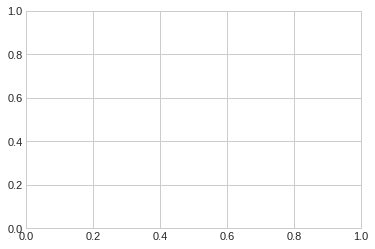

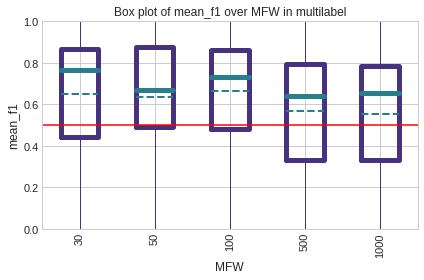

In [41]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW"]).head(10), "mean_f1", "MFW", wdir,"multilabel", rotation=90, baseline=0.5)


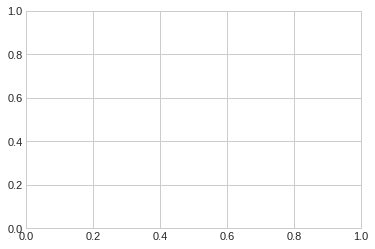

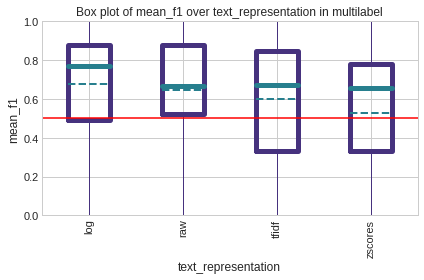

In [42]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(10), "mean_f1", "text_representation", wdir,"multilabel", rotation=90, baseline=0.5)


In [32]:
classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class"]).head(1).groupby(["class"]).median().to_csv(wdir+"1_results_classification_csv",sep="\t")

In [29]:
classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class"]).head(10).groupby(["class"]).median().to_csv(wdir+"10_results_classification_csv",sep="\t")

In [30]:
classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class"]).head(100).groupby(["class"]).median().to_csv(wdir+"100_results_classification_csv",sep="\t")

In [31]:
classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class"]).head(1000).groupby(["class"]).median().to_csv(wdir+"1000_results_classification_csv",sep="\t")